# Comparison of the content of the dataset documentation approaches

Before using add the "metadata-elements-comparison.xlsx" file in the "inputs" folder (see the README for details)

## Import required packages and set plot settings

In [1]:
import itertools
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sentence_transformers import SentenceTransformer

In [2]:
sns.set(
    font="Franklin Gothic Book",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 16, "axes.titlesize": 20, "axes.labelsize": 18}
)

colors = ["#073b4c", "#ffd166", "#06d6a0"]
patterns = ["/", "\\", "-", "+", "x", "o", "O", ".", "*", "|"]

## Load data

In [47]:
dfs = pd.read_excel(
    "inputs/dataset/primary/metadata-elements-comparison.xlsx", sheet_name=None
)
df_list = dfs["List"]
del dfs["List"]
display(dfs["Datasheet"])
display(df_list)

,Question or field,Metadata element
0,For what purpose was the dataset created? Was ...,Description of the purpose for creating the da...
1,"Who created the dataset (e.g., which team, res...",Information about the creators of the dataset
2,Who funded the creation of the dataset? If the...,Details about the funding of the dataset
3,Any other comments?,NaN
4,What do the instances that comprise the datase...,Description of the instances included in the d...
...,...,...
61,"Will the dataset be updated (e.g., to correct ...",Description of the dataset update plan
62,"If the dataset relates to people, are there ap...",Description of the dataset retention policy
63,Will older versions of the dataset continue to...,Description of the management plan for older v...
64,If others want to extend/augment/build on/cont...,Description of the methods to contribute to th...


,Metadata element,Critical for clinical research datasets,Anna,Lingling,Kyongmi,Fritz
0,Description of the dataset,yes,yes,yes,yes,NaN
1,Information about dataset audit/review,no,no,no,yes,NaN
2,Information about the dataset versioning approach,no,no,no,yes,NaN
3,Version of the dataset associated with this da...,yes,yes,yes,yes,NaN
4,Information about the dataset documentation fo...,no,yes,yes,yes,NaN
...,...,...,...,...,...,...
134,Link to design document,no,no,no,yes,NaN
135,Description of the relevance of the data,no,yes,yes,yes,NaN
136,Description and results of the requirement tes...,no,no,no,no,NaN
137,Description and results of the adversarial tes...,no,no,no,no,NaN


## Check if any metadata elements are too similar and should be regrouped into one

In [48]:
# Get a list of all metadata elements
metadata_elements_list = []
for sheet, df in dfs.items():
    metadata_elements_list += list(df["Metadata element"])
metadata_elements_list = [
    x for x in metadata_elements_list if str(x) != "nan"
]  # remove nan value
metadata_elements_list = [
    s.strip() for s in metadata_elements_list
]  # remove spaces ends of string
metadata_elements_list = list(set(metadata_elements_list))  # keep only unique entries

critical_df_list = df_list[df_list["Critical for clinical research datasets"] == "yes"]
critical_metadata_elements_list = list(critical_df_list["Metadata element"])
df = pd.DataFrame(metadata_elements_list, columns=["Metadata element"])
# df.to_excel("outputs/metadata_elements_list.xlsx", index=False)
print("There are ", len(metadata_elements_list), " metadata elements")
print("There are ", len(critical_metadata_elements_list), " critical metadata elements")
display(df)

There are  139  metadata elements
There are  101  critical metadata elements


,Metadata element
0,Dataset maintenance status
1,Description of the process to mitigate risk fr...
2,Description of the dataset retention policy
3,Description of the dataset sharing method
4,Description of the confidential data
...,...
134,Other dataset metrics besides size
135,Description of benefits of the dataset compare...
136,Description and handling of mismatched values
137,Description of issues related to this dataset


In [49]:
# Encode metadata elements
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(metadata_elements_list)

# Get and save cosine similarity scores
similar_rows = []
unique_index_pairs = list(
    itertools.combinations(list(range(len(metadata_elements_list))), 2)
)
for index_pair in unique_index_pairs:
    i = index_pair[0]
    j = index_pair[1]
    element1 = metadata_elements_list[i]
    element2 = metadata_elements_list[j]
    cosine_similarity = np.dot(embeddings[i], embeddings[j]) / (
        np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j])
    )
    similar_rows.append([element1, element2, cosine_similarity])
df_similar = pd.DataFrame(
    similar_rows, columns=["Element 1", "Element 2", "cosine similarity score"]
)
df_similar = df_similar.sort_values(by="cosine similarity score", ascending=False)
display(df_similar)
df_similar.to_excel("outputs/metadata_elements_similarity.xlsx", index=False)

,Element 1,Element 2,cosine similarity score
1668,Version of the dataset associated with this da...,Information about the dataset documentation fo...,0.954538
2386,Description of the undesirable uses of the dat...,Description of the intended use of the dataset,0.908756
7543,Description of the intended use of the dataset,Description of the purpose for creating the da...,0.896263
8499,Information about the dataset documentation fo...,Information about the authors of this dataset ...,0.877440
1705,Version of the dataset associated with this da...,Information about the authors of this dataset ...,0.868454
...,...,...,...
1719,Description of other transformations,Recommendations when sampling the dataset,-0.099885
7815,Assumption in data fields not made explicit in...,Link to design document,-0.106389
6885,Description of the consent revocation mechanism,Other dataset metrics besides size,-0.110900
9169,Last update date,Description of the strategies to avoid undesir...,-0.114775


Note: We ran this on the first version of our metadata element assignment where we had 146 unique metadata elements. We manually reviewed each pair of elements in descending order of cosine similarity value. We noticed that below a similarity score of 0.75, the elements were not similar and therefore we did not manually check below that. We identified 7 pairs of metadata elements that could be regrouped into one and ended up with a total of 139 unique metadata elements after that.

## View metadata elements and related questions/fields side-by-side for further review

In [50]:
documentation_list = list(dfs.keys())
retrouped_list = []
for metadata_element in metadata_elements_list:
    dict_questions = {}
    for sheet, df in dfs.items():
        df = df.loc[df["Metadata element"] == metadata_element]
        dict_questions[sheet] = list(df["Question or field"])
    count = 0
    not_all_nan = True
    while not_all_nan:
        row = []
        if count == 0:
            row.append(metadata_element)
        else:
            row.append(math.nan)
        for sheet in documentation_list:
            sheet_list = dict_questions[sheet]
            if len(sheet_list) > count:
                row.append(sheet_list[count])
            else:
                row.append(math.nan)
        if all(i != i for i in row):
            not_all_nan = False
        else:
            retrouped_list.append(row)
        count += 1
df_regrouped = pd.DataFrame(
    retrouped_list, columns=["Metadata element"] + documentation_list
)
display(df_regrouped)
df_regrouped.to_excel(
    "outputs/metadata_elements_regrouped_all_documentation_approaches.xlsx", index=False
)

,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card
0,Dataset maintenance status,NaN,NaN,NaN,NaN,Select one:\n\nMAINTENANCE STATUS\nRegularly U...
1,Description of the process to mitigate risk fr...,NaN,NaN,NaN,NaN,Summarize the steps taken to identify and miti...
2,Description of the dataset retention policy,"If the dataset relates to people, are there ap...",NaN,NaN,"If the dataset relates to people, are there ap...",Specify the duration for which this dataset ca...
3,NaN,NaN,NaN,NaN,NaN,Summarize the retention policy for this datase...
4,NaN,NaN,NaN,NaN,NaN,Summarize any requirements and related steps t...
...,...,...,...,...,...,...
301,NaN,NaN,NaN,NaN,NaN,What risks were introduced because of this tra...
302,NaN,NaN,NaN,NaN,NaN,"What human oversight measures, including addit..."
303,NaN,NaN,NaN,NaN,NaN,What additional considerations were made?\n\nA...
304,Description of issues related to this dataset,NaN,Provide any access points to documentation of ...,NaN,NaN,NaN


## Analysis

### Comparison matrix

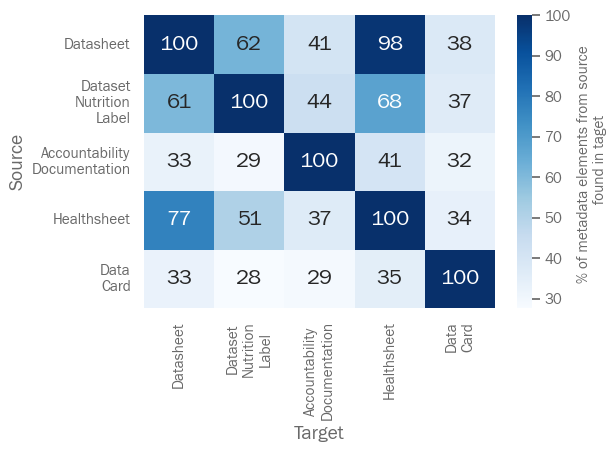

In [51]:
df_comparison = pd.DataFrame(
    index=list(dfs.keys()), columns=list(dfs.keys()), dtype=float
)
for documentation1 in df_comparison.index:
    df1 = dfs[documentation1]
    for documentation2 in df_comparison.columns:
        df2 = dfs[documentation2]
        df_comparison.loc[documentation1, documentation2] = (
            len(
                [
                    i
                    for i in list(df1["Metadata element"])
                    if i in list(df2["Metadata element"])
                ]
            )
            / len(list(df1["Metadata element"]))
            * 100
        )
labels = []
for doc in dfs.keys():
    if len(doc.split()) > 1:
        doc = "\n".join(doc.split())
    labels.append(doc)

df_comparison.to_excel("outputs/metadata_elements_comparison_matrix.xlsx", index=False)
ax = sns.heatmap(
    df_comparison,
    xticklabels=labels,
    yticklabels=labels,
    annot=True,
    cmap="Blues",
    fmt="0.0f",
    cbar_kws={"label": "% of metadata elements from source \n found in taget"},
)
ax.figure.axes[-1].yaxis.label.set_size(11)
ax.set_xlabel("Target", fontsize=14)
ax.set_ylabel("Source", fontsize=14)
plt.tight_layout()
plt.savefig("outputs/metadata_elements_comparison_matrix.png", dpi=200)

### Occurence of metadata elements accross dataset documentation

In [52]:
elements_count_list = []
for metadata_element in metadata_elements_list:
    row = [metadata_element]
    for sheet, df in dfs.items():
        if metadata_element in list(df["Metadata element"]):
            row.append("yes")
        else:
            row.append("no")
    row.append(len([i for i in row if i == "yes"]))
    if metadata_element in critical_metadata_elements_list:
        row.append("yes")
    else:
        row.append("no")
    elements_count_list.append(row)
df_element_count = pd.DataFrame(
    elements_count_list,
    columns=["Metadata element"] + list(dfs.keys()) + ["Count", "Critical"],
)
df_element_count = df_element_count.sort_values(by=["Count"], ascending=False)
df_element_count.to_excel("outputs/metadata_elements_count.xlsx", index=False)
display(df_element_count)

,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
3,Description of the dataset sharing method,yes,yes,yes,yes,yes,5,yes
74,Description of the intended use of the dataset,yes,yes,yes,yes,yes,5,yes
32,Description of the data collection process,yes,yes,yes,yes,yes,5,yes
55,Dataset publication date,yes,yes,yes,yes,yes,5,yes
63,Information about the owners of the dataset,yes,yes,yes,yes,yes,5,yes
...,...,...,...,...,...,...,...,...
134,Other dataset metrics besides size,no,no,no,no,yes,1,no
135,Description of benefits of the dataset compare...,no,no,no,no,yes,1,no
136,Description and handling of mismatched values,no,no,no,no,yes,1,yes
137,Description of issues related to this dataset,no,yes,no,no,no,1,yes


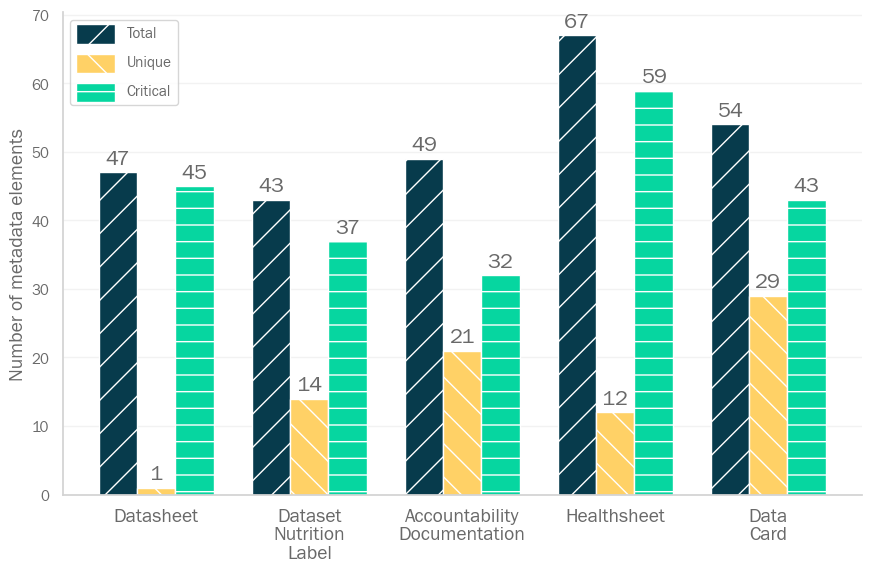

In [53]:
## Number of metadata elements and unique metadata elements per dataset documentation approach
count_metadata_elements = []
count_unique_metadata_elements = []
count_missing_critical_metadata_elements = []
labels = []
for doc in list(dfs.keys()):
    count_metadata_elements.append(df_element_count[doc].value_counts().get("yes", 0))
    count_unique_metadata_elements.append(
        len(
            df_element_count[
                (df_element_count[doc] == "yes") & (df_element_count["Count"] == 1)
            ]
        )
    )
    count_missing_critical_metadata_elements.append(
        len(
            df_element_count[
                (df_element_count[doc] == "yes")
                & (df_element_count["Critical"] == "yes")
            ]
        )
    )
    if len(doc.split()) > 1:
        doc = "\n".join(doc.split())
    labels.append(doc)

# plot
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

width = 0.25
y_list = [
    count_metadata_elements,
    count_unique_metadata_elements,
    count_missing_critical_metadata_elements,
]
labels_list = ["Total", "Unique", "Critical"]
x = np.arange(len(labels))
count = 0
for y in y_list:
    bars = ax.bar(
        x + width * count,
        y,
        width,
        color=colors[count],
        hatch=patterns[count],
        label=labels_list[count],
    )
    ax.bar_label(bars, padding=3)
    count += 1

ax.set_xticks(x + width, labels, fontsize=14)
ax.set_ylabel("Number of metadata elements", fontsize=14)
ax.set_axisbelow(True)
leg = ax.legend(loc="upper left", labelspacing=1, handlelength=2.5, facecolor="white")
for patch in leg.get_patches():
    patch.set_height(14)
    patch.set_y(-5)
ax.grid(axis="y", color="0.95")
plt.grid(color="0.95", axis="y")

fig.tight_layout()
fig.savefig("outputs/metadata_elements_view.png", dpi=200)

In [57]:
df_common = df_element_count[df_element_count["Count"] == 5]
df_unique = df_element_count[df_element_count["Count"] == 1]
print(
    "There are",
    len(df_common),
    "metadata elements that are found in all five documentation approaches",
)
print(
    "There are",
    len(df_unique),
    "metadata elements that are found only in one of the five documentation approaches",
)
display(df_common)

There are 7 metadata elements that are found in all five documentation approaches
There are 77 metadata elements that are found only in one of the five documentation approaches


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
3,Description of the dataset sharing method,yes,yes,yes,yes,yes,5,yes
74,Description of the intended use of the dataset,yes,yes,yes,yes,yes,5,yes
32,Description of the data collection process,yes,yes,yes,yes,yes,5,yes
55,Dataset publication date,yes,yes,yes,yes,yes,5,yes
63,Information about the owners of the dataset,yes,yes,yes,yes,yes,5,yes
130,Description of the dataset update plan,yes,yes,yes,yes,yes,5,yes
119,Details about the funding of the dataset,yes,yes,yes,yes,yes,5,yes


In [58]:
# Least common
for dataset_documentation in dfs.keys():
    print("----- Unique metadata description in " + dataset_documentation + " -----")
    df_unique = df_element_count[
        (df_element_count["Count"] == 1)
        & (df_element_count[dataset_documentation] == "yes")
    ]
    display(df_unique)

----- Unique metadata description in Datasheet -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
114,Description of the possibilities to identify i...,yes,no,no,no,no,1,yes


----- Unique metadata description in Dataset Nutrition Label -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
11,Description of representation issues in the data,no,yes,no,no,no,1,yes
62,Keywords,no,yes,no,no,no,1,no
31,Description of the proxy characteristics in th...,no,yes,no,no,no,1,no
90,Information about the format/structure of the ...,no,yes,no,no,no,1,yes
78,Assumption in data fields not made explicit in...,no,yes,no,no,no,1,no
89,Description of the involvement of the particip...,no,yes,no,no,no,1,yes
106,Familiarity of creators of this dataset docume...,no,yes,no,no,no,1,yes
100,Required domain-specific knowledge for proper ...,no,yes,no,no,no,1,yes
99,Known issues with data collection,no,yes,no,no,no,1,yes
123,Description of the strategies to avoid undesir...,no,yes,no,no,no,1,yes


----- Unique metadata description in Accountability Documentation -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
7,Description of the relevance of the data,no,no,yes,no,no,1,no
36,Description of the data rating process,no,no,yes,no,no,1,no
25,List of related documents,no,no,yes,no,no,1,no
14,Description of domain specific concepts for ge...,no,no,yes,no,no,1,no
71,Description of the dataset processing process,no,no,yes,no,no,1,yes
68,Description and results of other testing,no,no,yes,no,no,1,no
60,Expectations for people using the dataset,no,no,yes,no,no,1,no
48,Description of the data quality measurements,no,no,yes,no,no,1,yes
43,Description of the process for creating this d...,no,no,yes,no,no,1,yes
54,Information about the data collection cost,no,no,yes,no,no,1,yes


----- Unique metadata description in Healthsheet -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
9,Description of the confounding factors that mi...,no,no,no,yes,no,1,yes
70,Description of the strategies to avoid reident...,no,no,no,yes,no,1,yes
65,Number of subjects represented in the dataset,no,no,no,yes,no,1,yes
24,Guidelines for creating new labels,no,no,no,yes,no,1,yes
19,Information about the dataset versioning approach,no,no,no,yes,no,1,no
86,Description of the accessibility measurements,no,no,no,yes,no,1,no
91,Information about the dataset documentation fo...,no,no,no,yes,no,1,no
82,Countries where the data was collected,no,no,no,yes,no,1,yes
111,Description of the study inclusion criteria,no,no,no,yes,no,1,yes
122,Description of the factors in the data that mi...,no,no,no,yes,no,1,yes


----- Unique metadata description in Data Card -----


,Metadata element,Datasheet,Dataset Nutrition Label,Accountability Documentation,Healthsheet,Data Card,Count,Critical
0,Dataset maintenance status,no,no,no,no,yes,1,yes
8,Description of the human data attributes,no,no,no,no,yes,1,no
1,Description of the process to mitigate risk fr...,no,no,no,no,yes,1,yes
42,Description of the dimensionality reduction,no,no,no,no,yes,1,yes
41,Description of annotations,no,no,no,no,yes,1,yes
38,Description and handling of the outliers,no,no,no,no,yes,1,yes
35,Information about risks when used with other data,no,no,no,no,yes,1,yes
67,Information about the first version of the dat...,no,no,no,no,yes,1,no
66,Definition of the acronyms and concepts used i...,no,no,no,no,yes,1,yes
50,Description of the joint inputs sourced,no,no,no,no,yes,1,yes
